# Utililty functions etc

`autoreload` etc helps when testing modules created by this notebook - i.e. we can make a change via `%%writefile` and not need to re-start the kernel ... most of the time (o:

In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path

Start my making sure the utils directory exists

In [2]:
Path('utils').mkdir(exist_ok=True)

Create a `utils.all` module so that we can easily import all util packages in one go

In [3]:
%%writefile 'utils/all.py'
import importlib
from pathlib import Path
for py_file in Path('utils').glob('*.py'):
    if 'all' == py_file.stem:
        continue # we'll import every .py file in utils except utils/all.py
    module = importlib.import_module(f'utils.{py_file.stem}')
    # make everything in __all__ available via the current scopes global variables
    globals().update({k: getattr(module, k) for k in module.__all__})
    # this is like doing a `from module import *`

Overwriting utils/all.py


In [18]:
%%writefile 'utils/plot_history.py'

import matplotlib.pyplot as plt

__all__ = ['plot_history']

def _plot(history_dict, what, ignore_first_n):
    plt.clf()
    epochs = range(1, len(history_dict[what])+1-ignore_first_n)
    plt.plot(epochs, history_dict[what][ignore_first_n:], 'bo', label=f'Training {what}')
    if f'val_{what}' in history_dict:
        plt.plot(epochs, history_dict[f'val_{what}'][ignore_first_n:], 'b', label=f'Validation {what}')
        plt.title(f'Training and validation {what}')
    else:
        plt.title(f'Training {what}')
    plt.xlabel('Epochs')
    plt.ylabel(what.title())
    plt.legend()
    plt.show()
    
def plot_history(history, ignore_first_n=0):
    """Plot metrics in `history`.
    `history` can be a `keras.callbacks.History` or a `keras.callbacks.History.history` like dictionary.
    `ignore_first_n` number of epochs to ignore."""
    history_dict = history if isinstance(history, dict) else history.history
    for k in history_dict:
        if k.startswith('val_'):
            continue
        _plot(history_dict, k, ignore_first_n)

Overwriting utils/plot_history.py


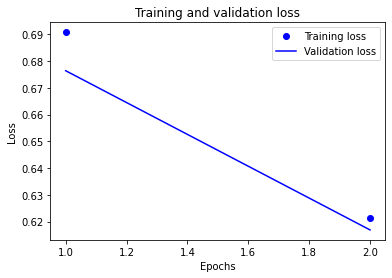

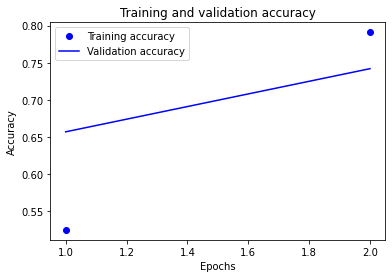

In [13]:
from utils.plot_history import *

history_dict = {
    'loss': [0.6907759308815002, 0.6212230920791626],
    'accuracy': [0.5249999761581421, 0.7910000085830688],
    'val_loss': [0.6763951182365417, 0.6168703436851501],
    'val_accuracy': [0.6570000052452087, 0.7419999837875366]}
class MockHistory:
    def __init__(self, history):
        self.history = history
history = MockHistory(history_dict)
plot_history(history)

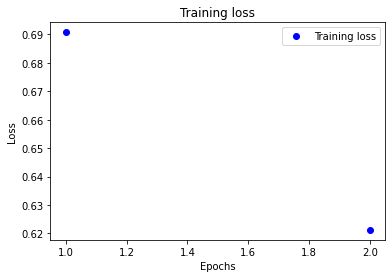

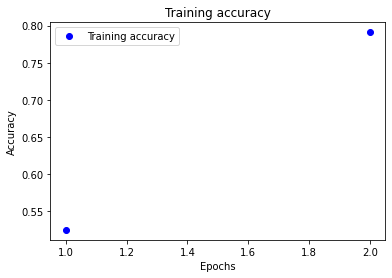

In [19]:
history_dict = {
    'loss': [0.6907759308815002, 0.6212230920791626],
    'accuracy': [0.5249999761581421, 0.7910000085830688]}
history = MockHistory(history_dict)
plot_history(history)

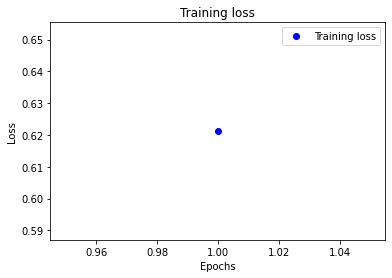

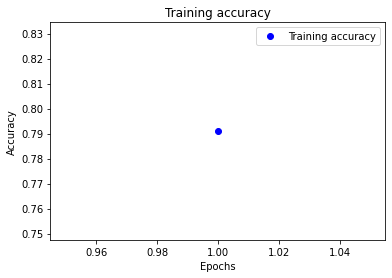

In [21]:
plot_history(history_dict, 1) # not very existing to look at (o: but we can pass a dict and ignore the 1st epoch